In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
X = data.drop(columns = ['target'])
y = data['target'] 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# accuracy before feature engineering
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_pred = log_reg.predict(x_test)
log_acc = accuracy_score(y_test, log_pred)
print(f'Logistic Regression Before Feature Engineering: {log_acc}')
print(classification_report(y_test,log_pred))

Logistic Regression Before Feature Engineering: 0.7853658536585366
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_pred)
print(f'Random Forest Before Feature Engineering: {rf_acc}')

Random Forest Before Feature Engineering: 0.9853658536585366


In [12]:
import featurewiz as fw

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [13]:
test_data = x_test.join(y_test)

In [14]:
def division_with_small_constant(df, *args):
    for col in args:
        # Add a small constant to the denominator to prevent division by zero
        print(f"Processing column: {col}")
        df[f'{col}_result'] = df[col] / (df[col] + 1e-6)

    return df



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
You supplied feature_engg_custom = <function division_with_small_constant at 0x0000024E19F6D700>
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (820, 14)
#### Single_Label Binary_Classification problem ####
loading the entire test dataframe - there is no nrows limit applicable #########
    Loaded test data. Shape = (205, 14)
#######################################################################################
######

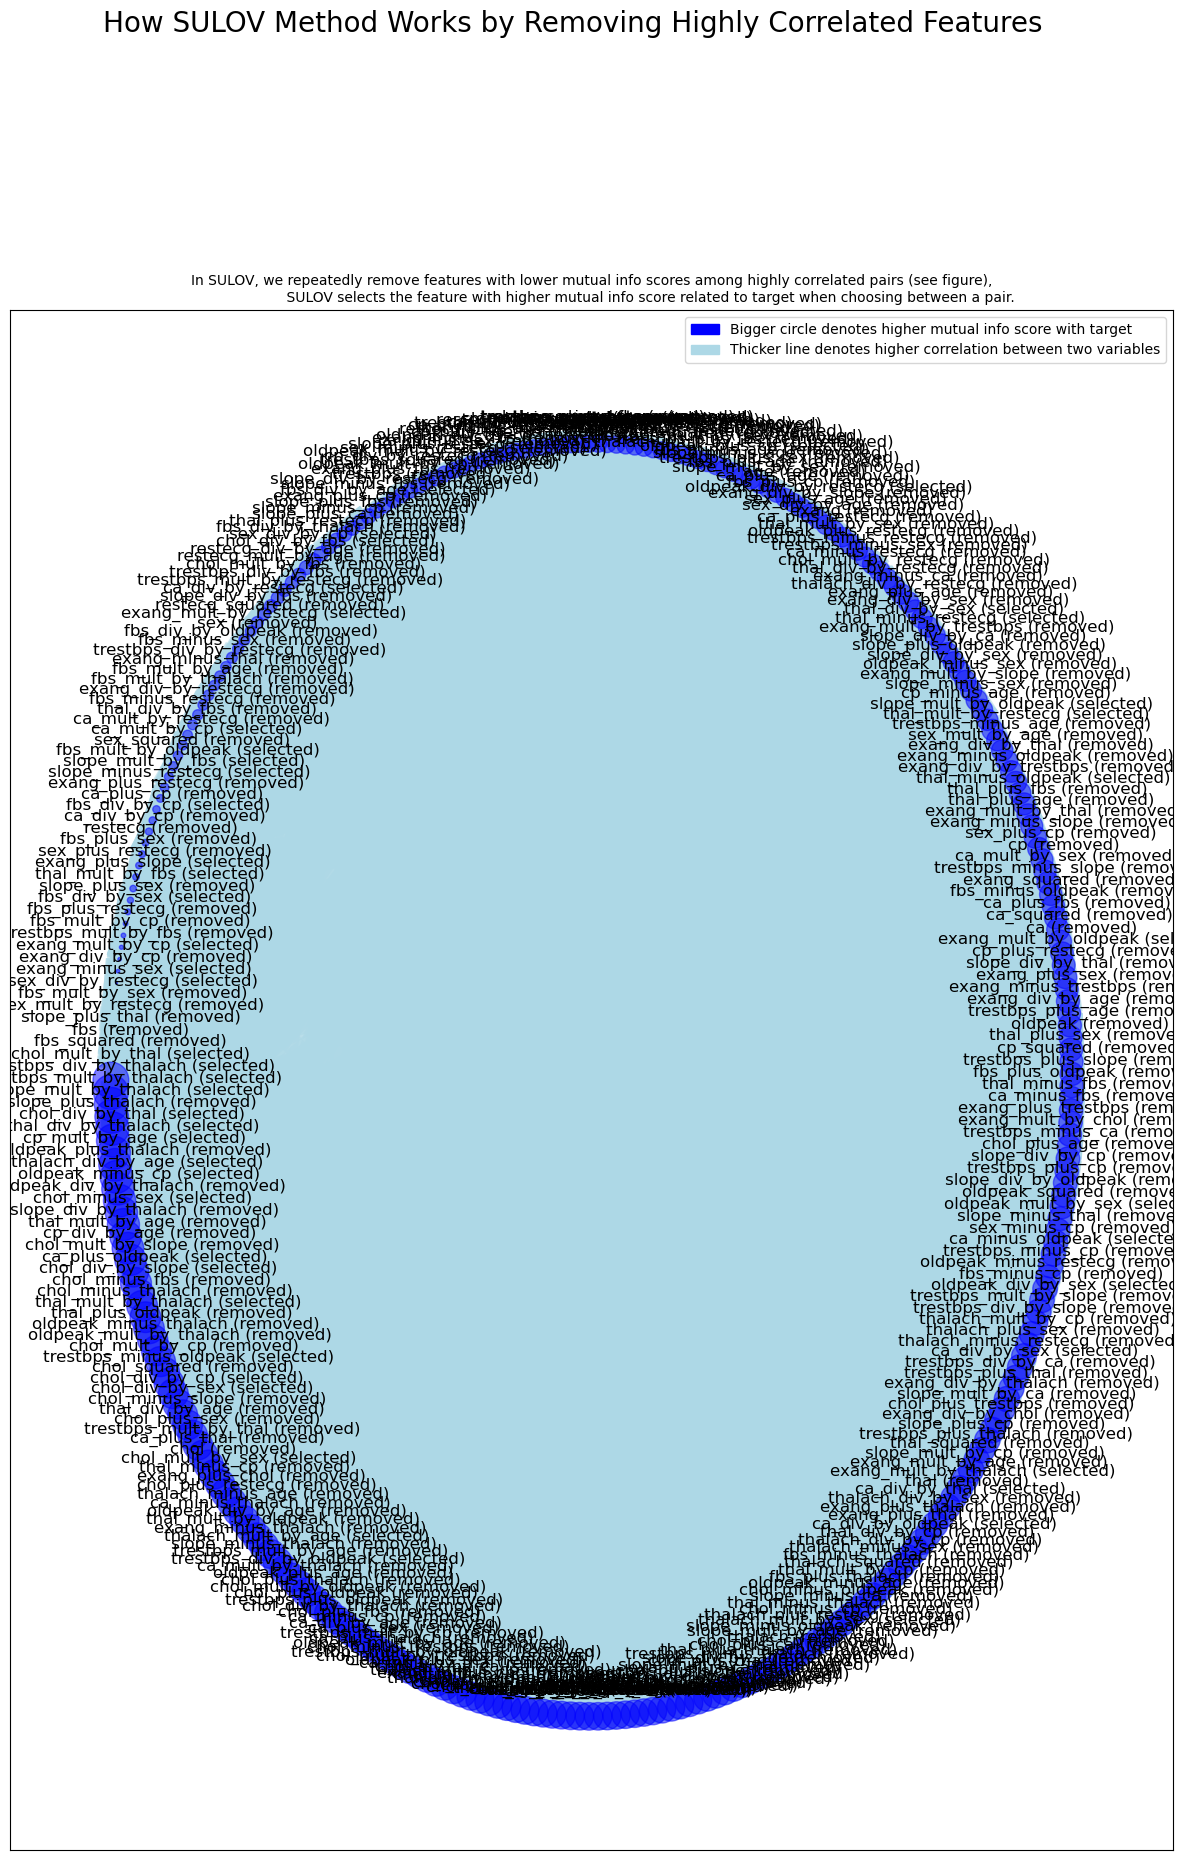

Time taken for SULOV method = 4 seconds
    Adding 0 categorical variables to reduced numeric variables  of 69
Finally 69 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Since ['groupby', 'target', 'interactions'] category encoding is done, dropping original categorical vars from predictors...
    Taking top 67 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
            Time taken for regular XGBoost feature selection = 0 seconds
        Selected: ['ol

In [15]:
#training featurewiz
train_features = fw.featurewiz(x_train.join(y_train),test_data = test_data, target='target',
                              corr_limit=0.7, verbose=1, category_encoders='',
                              feature_engg = ["groupby",'target','interactions'],
                              feature_engg_custom=division_with_small_constant)

In [16]:
train_features[1]['target'] = y_test

In [17]:
train_features_cleaned = train_features[0].dropna(axis=1)
test_features_cleaned = train_features[1].dropna(axis=1)
test_features_cleaned['target']=y_test

In [18]:
x_train_selected = train_features_cleaned.drop(columns=['target'])
y_train = train_features_cleaned['target']

x_test_selected = test_features_cleaned.drop(columns=['target'])
y_test = test_features_cleaned['target']

In [19]:
# accuracy after feature engineering with featurewiz
log_reg2 = LogisticRegression(max_iter=1000)
log_reg2.fit(x_train_selected ,y_train)
log_pred2 = log_reg2.predict(x_test_selected)
log_acc2 = accuracy_score(y_test, log_pred2)
print(f'Logistic Regression After Feature Engineering: {log_acc2}')
print(classification_report(y_test,log_pred2))







Logistic Regression After Feature Engineering: 0.8
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       102
           1       0.77      0.86      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [20]:
train_features

(     oldpeak_minus_cp  oldpeak_div_by_cp  thal_div_by_thalach  ca_div_by_sex  \
 835              -1.2                0.4             0.015873            3.0   
 137               0.0                NaN             0.012987            NaN   
 534              -2.0                0.0             0.011976            NaN   
 495               0.5                NaN             0.018634            0.0   
 244               0.4                1.2             0.012048            0.0   
 ..                ...                ...                  ...            ...   
 700               0.0                1.0             0.011905            0.0   
 71                1.9                NaN             0.021739            1.0   
 106               1.6                NaN             0.017341            0.0   
 270               0.0                NaN             0.018634            0.0   
 860               0.0                NaN             0.012500            1.0   
 
      chol_div_by_slope  c

In [21]:
rf2 = RandomForestClassifier()
rf2.fit(x_train_selected,y_train)
rf_pred2 = rf2.predict(x_test_selected)
rf_acc2 = accuracy_score(y_test,rf_pred2)
print(f'Random Forest After Feature Engineering: {rf_acc2}')
print(classification_report(y_test,rf_pred2))

Random Forest After Feature Engineering: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [22]:
from pycaret.classification import *

In [23]:
# defining a setup for pycaret with polynomial features and using pca with mle function to select features with higher variances
setup(
    data=x_train.join(y_train), 
    target='target',        
    session_id=42, 
    polynomial_features=True,
    pca = True,
    pca_components = "mle",
)

lr_model = create_model('lr') 

evaluate_model(lr_model)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(820, 14)"
4,Transformed data shape,"(820, 102)"
5,Transformed train set shape,"(574, 102)"
6,Transformed test set shape,"(246, 102)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9483,0.9726,0.9667,0.9355,0.9508,0.8963,0.8968
1,0.9483,0.9655,0.9333,0.9655,0.9492,0.8966,0.8971
2,0.8448,0.9060,0.8667,0.8387,0.8525,0.6889,0.6893
3,0.9138,0.9607,0.9333,0.9032,0.9180,0.8272,0.8277
4,0.8596,0.8765,0.8667,0.8667,0.8667,0.7185,0.7185
5,0.7544,0.8901,0.7667,0.7667,0.7667,0.5074,0.5074
6,0.8421,0.9286,0.7931,0.8846,0.8364,0.6847,0.6885
7,0.8596,0.9544,0.9310,0.8182,0.8710,0.7185,0.7257
8,0.8070,0.8805,0.8276,0.8000,0.8136,0.6137,0.6141


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
test_predictions = predict_model(lr_model, data=x_test.join(y_test))


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8341,0.8873,0.8932,0.8000,0.8440,0.6681,0.6727


In [25]:
train_config = get_config('X_train_transformed')

In [26]:
train_config

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100
288,57853.990914,-9150.040533,8186.237023,2520.034828,-503.553141,1080.875169,935.116783,-111.705048,-17.035893,59.897353,...,-0.078949,-0.011267,0.007673,-0.007176,-0.027799,-0.041591,-0.001130,0.013198,0.019237,-0.002709
204,18155.819209,-1798.008728,-5960.819923,3284.713033,-951.858251,-234.256572,-113.318824,-515.261047,8.208935,131.830646,...,-0.081913,-0.001359,-0.000841,0.024897,0.004065,-0.022390,-0.035266,-0.020982,0.028600,0.000758
282,-21518.221854,-8916.790577,1421.271219,-2687.561264,569.611156,-392.756279,-146.934171,-36.521848,14.651835,153.895292,...,0.059647,-0.012933,0.015992,0.020704,-0.020613,0.000326,0.012063,-0.031478,0.006579,-0.008342
744,40159.883915,-2714.401226,13821.737806,3974.999416,-0.154872,1283.042273,1200.177327,108.400390,-355.661010,495.964428,...,-0.064947,0.062454,-0.003900,0.038169,0.005322,-0.027571,-0.017803,0.019726,-0.014857,0.004189
952,34416.686791,-9480.486753,452.571572,352.799869,-1485.922104,363.613578,196.977766,-418.151000,120.157711,-54.738668,...,-0.005378,-0.030861,0.005813,-0.047027,-0.029646,-0.009011,0.009420,0.008766,-0.025298,0.006181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,-20978.118991,-5162.615761,-6544.178812,1894.524900,1493.844153,385.426860,-323.403722,-122.926031,-400.564369,-387.326939,...,-0.043122,0.052581,0.059717,0.003365,0.030678,0.046122,0.031326,-0.011260,0.012444,0.022573
631,10707.670202,-9599.798015,1773.461295,-616.393195,-1346.950857,189.927944,71.488847,-28.891369,16.737471,-115.767752,...,0.037228,-0.012829,0.018100,-0.011999,0.011855,0.024157,0.004555,-0.003483,0.001003,-0.007608
623,-7761.442791,1563.123657,-1398.565961,2018.156094,-573.521002,199.217833,-267.472482,22.047320,523.115033,608.813017,...,0.031635,-0.010601,-0.011422,0.029777,0.035095,0.014811,-0.004516,-0.003292,0.001547,-0.024861
275,15812.612944,18101.983357,934.258885,-1973.883443,237.829270,-1322.360092,-202.414886,-120.938090,179.808973,-192.506292,...,-0.041704,0.005446,0.061660,-0.090559,0.024163,0.020569,0.012737,0.018068,0.005272,0.014461


In [27]:
column_names = train_config.columns

In [28]:
batch_size = 10 
for i in range(0, len(column_names), batch_size):
    print(column_names[i:i+batch_size])

Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9'],
      dtype='object')
Index(['pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17',
       'pca18', 'pca19'],
      dtype='object')
Index(['pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27',
       'pca28', 'pca29'],
      dtype='object')
Index(['pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37',
       'pca38', 'pca39'],
      dtype='object')
Index(['pca40', 'pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47',
       'pca48', 'pca49'],
      dtype='object')
Index(['pca50', 'pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57',
       'pca58', 'pca59'],
      dtype='object')
Index(['pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67',
       'pca68', 'pca69'],
      dtype='object')
Index(['pca70', 'pca71', 'pca72', 'pca73', 'pca74', 'pca75', 'pca76', 'pca77',
       'pca78', 'pca79'],
      dtype='obj

In [29]:
setup(
    data=x_train.join(y_train), 
    target='target',        
    session_id=42, 
    polynomial_features=True,
    pca = True,
    pca_components = "mle",
)

rf_model = create_model('rf') 

evaluate_model(rf_model)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(820, 14)"
4,Transformed data shape,"(820, 102)"
5,Transformed train set shape,"(574, 102)"
6,Transformed test set shape,"(246, 102)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9655,0.9940,0.9667,0.9667,0.9667,0.9310,0.9310
1,0.9655,0.9964,0.9667,0.9667,0.9667,0.9310,0.9310
2,0.9828,0.9940,1.0000,0.9677,0.9836,0.9654,0.9660
3,0.9655,0.9887,0.9667,0.9667,0.9667,0.9310,0.9310
4,0.9123,0.9914,0.9333,0.9032,0.9180,0.8237,0.8243
5,0.9825,0.9988,1.0000,0.9677,0.9836,0.9647,0.9653
6,0.9649,1.0000,0.9310,1.0000,0.9643,0.9299,0.9322
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9123,0.9877,0.8276,1.0000,0.9057,0.8250,0.8380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [30]:
#getting prediction on test dataset
test_predictions = predict_model(rf_model, data=x_test.join(y_test))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9268,0.9897,0.9126,0.9400,0.9261,0.8537,0.8540
